In [1]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers, losses, metrics

import numpy as np

Using TensorFlow backend.


<br>
<br>

# 데이터 생성

In [2]:
# 캐릭터 글자 목록
char_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
             'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [3]:
# 캐릭터 사전 생성
dictionary = {c: i for i, c in enumerate(char_list)} # 그냥 index 순서대로 부여하였음
dic_len = len(dictionary)

print(dictionary)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [4]:
# 단어 목록
# 앞의 세 글자가 주어지면 마지막 글자를 예측
# lov -> e
word_list = ['love', 'look', 'face', 'fast', 'home', 'hope',
             'good', 'gold', 'tree', 'true', 'road', 'rock']

In [5]:
input_onehot = []
target_onehot = []

In [6]:
[dictionary[c] for c in 'love'[:-1]] # dic에서 'key'값으로 value 가져오기

[11, 14, 21]

In [7]:
np.eye(10) # 단위행렬

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
np.eye(10)[[1,3,4]]  # 1행 3행 4행 선택

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [9]:
for word in word_list:
    input = [dictionary[c] for c in word[:-1]]     # lov를 인덱스로 변환
    target = dictionary[word[-1]]                  # 목표 캐릭터 e를 인덱스로 변환
    input_onehot.append(np.eye(dic_len)[input])    # lov 인덱스를 원핫인코딩으로 변환
    target_onehot.append(np.eye(dic_len)[target])  # e 인덱스를 원핫인코딩으로 변환

In [10]:
x_train, y_train = np.array(input_onehot), np.array(target_onehot)

In [11]:
# 잘 들어갔나 확인

In [12]:
x_train[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [13]:
for i in x_train[0] :
    print(list(i).index(1))
    print(list(dictionary)[list(i).index(1)])

11
l
14
o
21
v


In [14]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
for i in [y_train[0]] :
    print(list(i).index(1))
    print(list(dictionary)[list(i).index(1)])

4
e


<br>
<br>

# 모델 생성

In [16]:
x_train.shape

(12, 3, 26)

In [17]:
# 세 글자('lov') 넣으면 -> 한 글자('e') 알려주는 시스템
# one hot의 길이는 알파벳 26
time_step = 3
dic_len = 26
model = models.Sequential()
model.add(layers.LSTM(64, input_shape = (time_step, dic_len)))
model.add(layers.Dense(100))
model.add(layers.Dense(dic_len, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                23296     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                2626      
Total params: 32,422
Trainable params: 32,422
Non-trainable params: 0
_________________________________________________________________


<br>
<br>

# 훈련 및 테스트

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['mse','acc'])   

In [20]:
# 훈련 시작
model.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7450 - mse: 0.0146 - acc: 0.7500
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6779 - mse: 0.0134 - acc: 0.7500
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6453 - mse: 0.0131 - acc: 0.7500
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5819 - mse: 0.0116 - acc: 0.8333
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5467 - mse: 0.0111 - acc: 0.7500
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5028 - mse: 0.0102 - acc: 0.7500
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4524 - mse: 0.0092 - acc: 0.8333
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4186 - mse: 0.0083 - acc: 0.8333
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3818 - mse: 0.0077 - acc: 0.9167
Epoch 10/50
12/12 [==================

In [22]:
# 훈련셋 데이터 예측
# 26개 캐릭터의 원핫인코딩 형식
results = model.predict(x_train)
# 1축을 기준으로 최대값의 인덱스 구함
results = np.argmax(results, axis=1) 
results

array([ 4, 10,  4, 19,  4,  4,  3,  3,  4,  4,  3, 10], dtype=int64)

In [23]:
# 예측 결과 출력
for i, word in enumerate(word_list):
    last_char = char_list[results[i]]
    print(word[:3] + ' -> ' + word[:3] + last_char)

lov -> love
loo -> look
fac -> face
fas -> fast
hom -> home
hop -> hope
goo -> good
gol -> gold
tre -> tree
tru -> true
roa -> road
roc -> rock


In [24]:
word_list

['love',
 'look',
 'face',
 'fast',
 'home',
 'hope',
 'good',
 'gold',
 'tree',
 'true',
 'road',
 'rock']

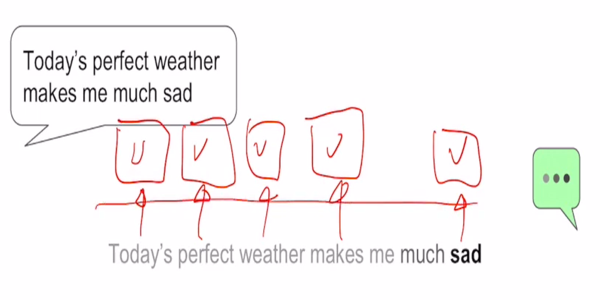

In [1]:
from PIL import Image

image = Image.open('11.png')
resize_image = image.resize((600,300))
resize_image